In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
cancer_sur = pd.read_csv("./dataset/haberman.csv")
cancer_sur.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [4]:
cancer_sur = pd.read_csv(
    "./dataset/haberman.csv",
    header=None,
    names=["Age", "operation_year", "axil_nodes_det", "surv_status"]
)
cancer_sur.head()

,Age,operation_year,axil_nodes_det,surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
print(cancer_sur.describe())

              Age  operation_year  axil_nodes_det  surv_status
count  306.000000      306.000000      306.000000   306.000000
mean    52.457516       62.852941        4.026144     1.264706
std     10.803452        3.249405        7.189654     0.441899
min     30.000000       58.000000        0.000000     1.000000
25%     44.000000       60.000000        0.000000     1.000000
50%     52.000000       63.000000        1.000000     1.000000
75%     60.750000       65.750000        4.000000     2.000000
max     83.000000       69.000000       52.000000     2.000000


In [6]:
print(cancer_sur.shape)

(306, 4)


In [7]:
cancer_sur["surv_status"].value_counts()

surv_status
1    225
2     81
Name: count, dtype: int64

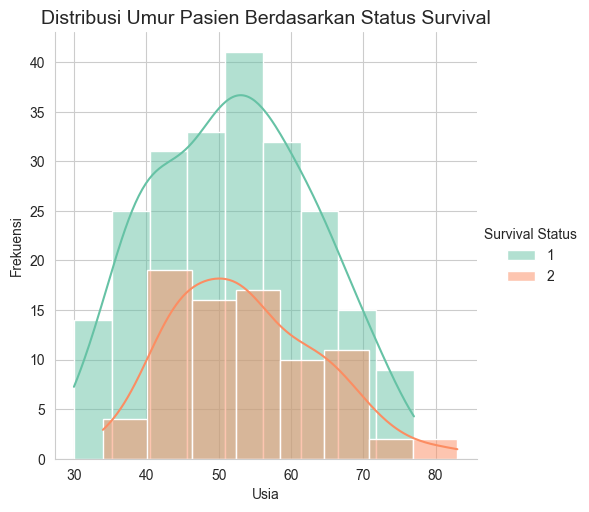

In [8]:
sns.set_style("whitegrid")

g = sns.FacetGrid(cancer_sur, hue="surv_status", height=5, palette="Set2")
g.map(sns.histplot, "Age", kde=True)
g.add_legend(title="Survival Status")

plt.title("Distribusi Umur Pasien Berdasarkan Status Survival", fontsize=14)
plt.xlabel("Usia")
plt.ylabel("Frekuensi")
plt.show()


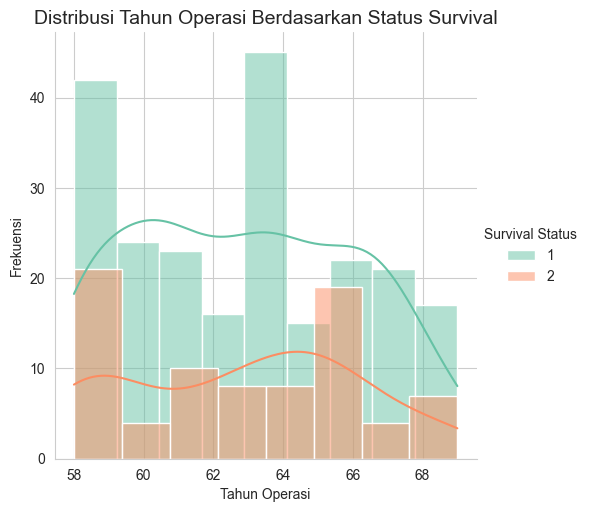

In [9]:
# Set style grid putih
sns.set_style("whitegrid")

# Bikin FacetGrid untuk operation_year
g = sns.FacetGrid(cancer_sur, hue="surv_status", height=5, palette="Set2")
g.map(sns.histplot, "operation_year", kde=True)
g.add_legend(title="Survival Status")

# Kasih judul dan label
plt.title("Distribusi Tahun Operasi Berdasarkan Status Survival", fontsize=14)
plt.xlabel("Tahun Operasi")
plt.ylabel("Frekuensi")
plt.show()


pdf = [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
bin_edges = [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
cdf = [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]


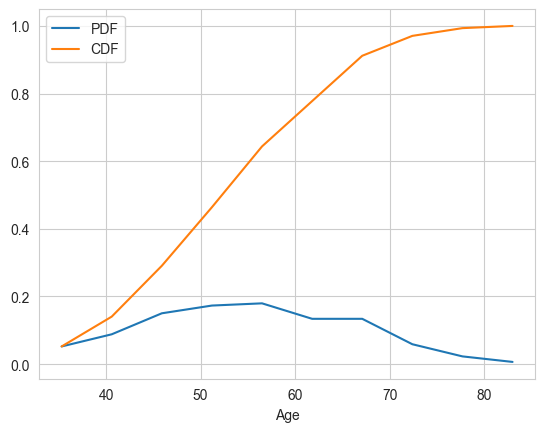

In [10]:

counts, bin_edges = np.histogram(cancer_sur['Age'], bins=10, density=True)

plt.xlabel('Age')

pdf = counts / sum(counts)
print("pdf =", pdf)
print("bin_edges =", bin_edges)

cdf = np.cumsum(pdf)
print("cdf =", cdf)

plt.plot(bin_edges[1:], pdf, label='PDF')
plt.plot(bin_edges[1:], cdf, label='CDF')

plt.legend()
plt.show()

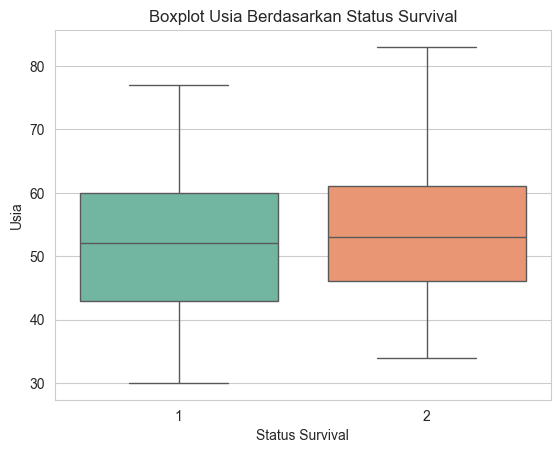

In [11]:

sns.set_style("whitegrid")

sns.boxplot(
    x='surv_status',
    y='Age',
    hue='surv_status',    
    data=cancer_sur,
    palette="Set2",
    legend=False           
)

plt.title("Boxplot Usia Berdasarkan Status Survival")
plt.xlabel("Status Survival")
plt.ylabel("Usia")
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1720\4044490163.py:5: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(


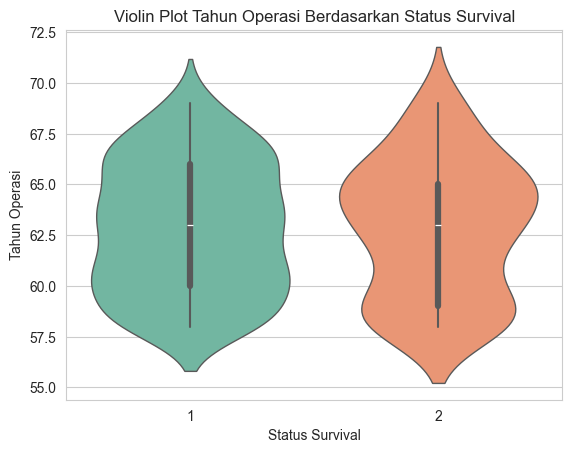

In [12]:
# Set whitegrid style
sns.set_style("whitegrid")

# Buat violin plot
sns.violinplot(
    x='surv_status',
    y='operation_year',
    hue='surv_status',
    data=cancer_sur,
    palette="Set2",
    scale='count',
    linewidth=1,
    legend=False
)

# Judul dan label
plt.title("Violin Plot Tahun Operasi Berdasarkan Status Survival")
plt.xlabel("Status Survival")
plt.ylabel("Tahun Operasi")
plt.show()


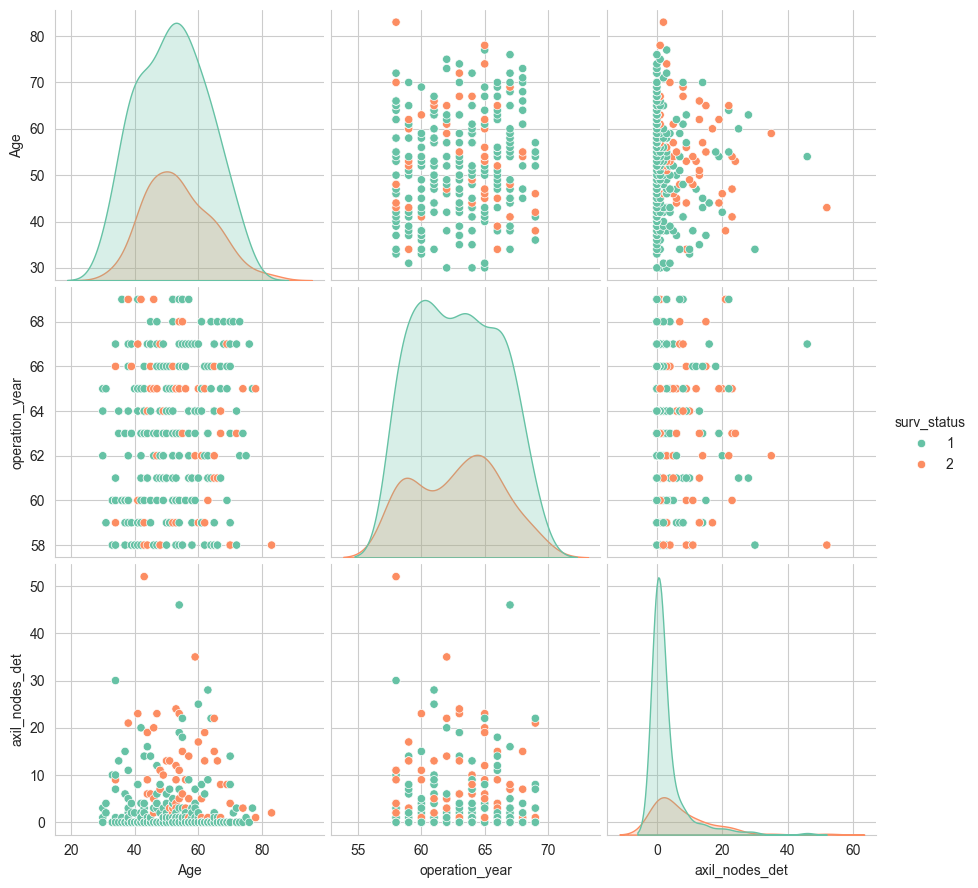

In [17]:
# Set whitegrid style
sns.set_style("whitegrid")

# Buat pairplot dengan nama kolom yang benar
sns.pairplot(
    cancer_sur,
    hue="surv_status",  # Gunakan surv_status, bukan survived
    height=3,
    palette="Set2"
)

# Tampilkan plot
plt.show()